## Step 0: setup

In [5]:
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

## Step 1 : tiny dataset

In [10]:
X = np.array(
    [
        [1, 2],
        [1.5, 1.8],
        [5, 8],
        [8, 8],
        [1, 0.6],
        [9, 11],
        [8, 2],
        [10, 2]
    ]
)

print(X.shape, f"{X.shape[0]} rows, {X.shape[1]} columns")

(8, 2) 8 rows, 2 columns


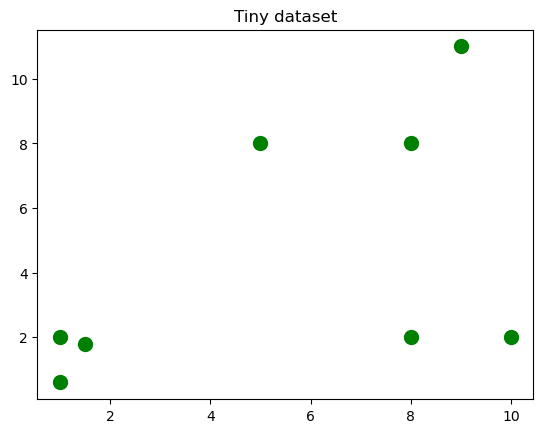

In [11]:
# visulise
plt.scatter(X[:, 0], X[:, 1], c='green', s=100)
plt.title("Tiny dataset")
plt.show()

## Step 2: Choose the number of clusters (k) and apply the kmeans model

In [13]:
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)  


* <b>n_cluster = 3</b>: means 3 clusters in data 
* <b>random_state </b>: sets the seed for random number generation to ensure reproducibility 
* <b>n_init = 10</b>: it means KMeans will run the algo 10 times with different centroid seeds and pick the best result (lowest inertia WCSS).
            helps avoid poor selection of starting centroids in the same cluster.

for more info refer this link : <a href= "https://www.reddit.com/user/Shiv_shar/comments/1n6by0a/kmeans_of_scikitlearn/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button">LINK</a>

In [14]:
kmeans.fit(X)

C:\Users\Shiv\Softwares\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

## Step 3: look at results

In [16]:
labels = kmeans.labels_   
# cluster id for each point, to which cluster the datapoint belongs , since here are 3 clusters, ids will be = (0, 1, 2)

print("Labels : ", labels)

Labels :  [2 2 0 0 2 0 1 1]


In [19]:
centroids = kmeans.cluster_centers_  # final centroids , shape will be 3x2, 2d centroid, 3 in numbers 

print("Centroids : \n\n", centroids)

Centroids : 

 [[7.33333333 9.        ]
 [9.         2.        ]
 [1.16666667 1.46666667]]


In [20]:
inertia = kmeans.inertia_  # total WCSS , within cluster sum of squared errors

print("Inertia (WCSS) : ", inertia)

Inertia (WCSS) :  17.98


#### let's visualise

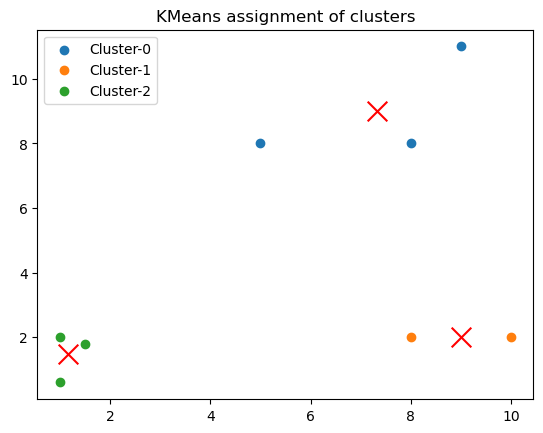

In [24]:
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label = f"Cluster-{i}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200)
plt.title("KMeans assignment of clusters")
plt.legend()
plt.show()

## Step 5: Predicting a new point

In [25]:
new_points = np.array(
    [
        [8, 1],
        [5.0, 5.1]
    ]
)

print(new_points.shape)

(2, 2)


In [26]:
print(kmeans.predict(new_points))

[1 0]


these are the cluster ids for the respective two points
* [8, 1] in cluster 1
* [5.0, 5.1] in cluster 0